# Prosper Loan Data Exploration
## By Tayebwa Crispus

## Investigation Overview

> Some of the objectives for this investigation are:
* To establish whether borrowers are taking on more debt than their income can support.
* To establish which State has the most listings that borrowers have created.


## Dataset Overview

The Prosper loan dataset comprises of 113937 loan entries with 81 attributes on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others, during the year 2009-2014. There are two primary categories:

> Borrower information: Basic qualities of the borrowers such as annual income, condition of employment, interest rate, loan status, etc.
> Loan performance information: Metrics analyzing the risk connected with the loans such as Prosper score and bank card utilization, etc.

In [2]:
# import all packages and set plots to be embedded inline
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('prosperLoanData.csv')

In [5]:
target_columns =  ['ListingCreationDate', 'ListingCategory (numeric)', 'BorrowerState', 'IsBorrowerHomeowner',
                'IncomeRange', 'IncomeVerifiable', 'DebtToIncomeRatio', 'StatedMonthlyIncome', 'Term', 'ProsperRating (Alpha)',
                'EmploymentStatus', 'LoanStatus', 'LoanOriginalAmount', 'BorrowerAPR', 'Occupation']

In [6]:
clean_df = df.copy()

In [7]:
# Extract target columns from the original dataframe
clean_df = clean_df[target_columns]

# Verify the changes
assert len(clean_df.columns) == len(target_columns)

In [9]:
# Reading the downloaded state data
state_df = pd.read_csv('state_data.csv')

In [12]:
loan_df = pd.merge(clean_df, state_df, left_on='BorrowerState', right_on='State')

## Do the majority of loans have high or low borrower APR values according to the dataset's distribution of borrower APR values?
* With peaks at 0.09, 0.2, and 0.3, the borrower APR seems to follow a multimodal distribution. There is also a fairly steep peak between 0.35 and 0.36. Few postings, on average, have borrower APRs higher than 0.4.

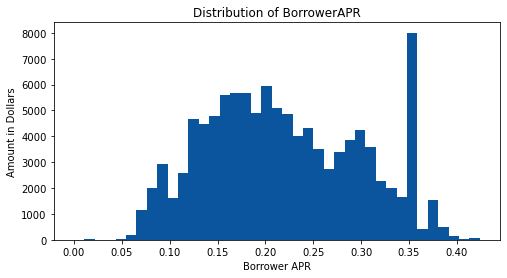

In [13]:
# Setting color for all univariate plots
colors = sns.color_palette('Blues')

bins = np.linspace(0, loan_df.BorrowerAPR.max(), 40)

plt.figure(figsize=(8, 4))
plt.hist(data=loan_df, x='BorrowerAPR', bins=bins, color = colors[5]);
plt.title("Distribution of BorrowerAPR")
plt.xticks(np.arange(0, 0.45, 0.05))
plt.xlabel('Borrower APR')
plt.ylabel("Amount in Dollars");

## Are borrowers taking on more debt than their income can support? How are the values for the debt-to-income ratio distributed?
* Right-skewed distribution can be seen in the debt-to-income ratio. Most borrowers appear to favor taking out loans that are affordable. This is understandable because the majority of values are spread out between 0 and 1.
* When we enlarge this distribution, we can make out a peak between 0.20 and 0.25. This may indicate that borrowers prefer to keep their debt levels between 25% and 50% of their income. Living within their means seems to be accomplished in this way.

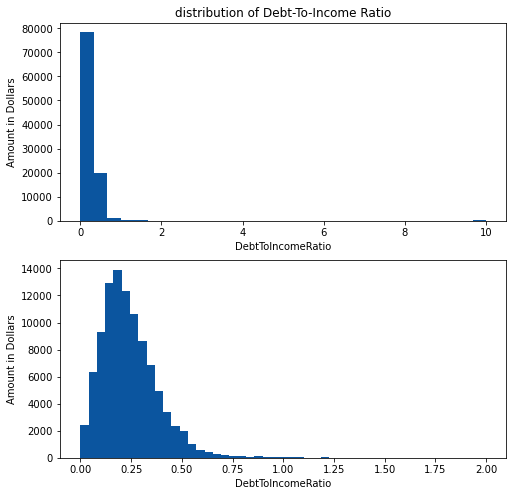

In [14]:
plt.figure(figsize=(8, 8))

plt.subplot(2,1,1)
plt.title('distribution of Debt-To-Income Ratio')
plt.hist(data=loan_df, x='DebtToIncomeRatio', bins=30, color = colors[5]);
plt.xlabel('DebtToIncomeRatio')
plt.ylabel("Amount in Dollars");

# Expand the distribution in order to examine clearly, with evenly spaced bins
bins = np.linspace(0, 2, 50)
plt.subplot(2,1,2)
plt.hist(data=loan_df, x='DebtToIncomeRatio', bins=bins, color = colors[5]);
plt.xlabel('DebtToIncomeRatio')
plt.ylabel("Amount in Dollars");

## Which states have the most listings that borrowers have created?
* With almost 10,000 loan postings coming from Californian borrowers, the state has the most listed borrowers overall. Additionally, over 4000 ads each have been supplied by borrowers from New York, Texas, Florida, and Illinois. It's also noteworthy that Prosper is a California-based business. This may help to explain why the majority of borrowers came from there.

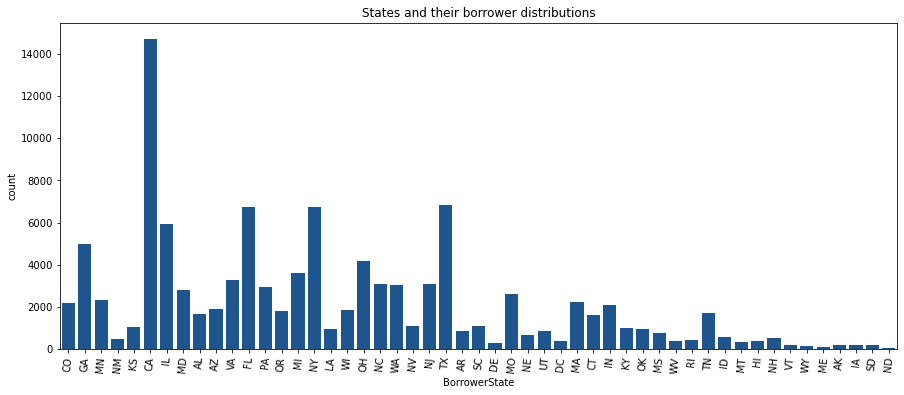

In [15]:
plt.figure(figsize=(15, 6))
plt.title('States and their borrower distributions')
sns.countplot(data=loan_df, x='BorrowerState', color = colors[5])
plt.xticks(rotation= 85);

In [ ]:
!jupyter nbconvert Slides.ipynb --to slides --post serve --no-input --no-prompt